#Multi-Label Classification(Blog Tags Prediction)using NLP
## by Indresh Bhattacharyya

https://medium.com/coinmonks/multi-label-classification-blog-tags-prediction-using-nlp-b0b5ee6686fc

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/learning-stack/Colab-ML-Playbook/blob/master/NLP/Multi-Label%20Classification%20Blog%20Tags%20Prediction/Tag_Prediction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/learning-stack/Colab-ML-Playbook/blob/master/NLP/Multi-Label%20Classification%20Blog%20Tags%20Prediction/Tag_Prediction.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Import the needed libraries pandas for Data Frame and urllib3 for connecting to the web and fetching the data. Beautiful Soup is a Python package for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.

In [0]:
import urllib3
from bs4 import BeautifulSoup

In [0]:
http=urllib3.PoolManager()

Creating empty dataFrame for title and body **column=[‘Title’,’Body’] dfBA=DataFrame(columns=column)**

In [0]:
from pandas import DataFrame
column=['Title','Body']
dfBA=DataFrame(columns=column)
dfT=DataFrame(columns=[0,1,2,3,4])
def CreateDataFrame(someList):
    t={}
    d={'Title':[someList[0]],'Body':[someList[1]]}
    for n in range(5):
        if len(someList[2])>n:
            t[n]=[someList[2][n]]
        else:
            t[n]=['0']
    toDf=DataFrame(data=d)
    global dfBA,dfT
    #print(dfBA)
    dfBA=dfBA.append(toDf)
    #print(dfBA)
    dfT=dfT.append(DataFrame(data=t))

The spider function will go into the web pages and get the links for all the posts in the web page.

In [0]:
def CrawlAndFrame(link):
    print(link)
    blogData=http.request('GET',link)
    soup=BeautifulSoup(blogData.data,'html.parser')
    article=''
    tags=[]
    heading=soup.find('h1').text
    for para in soup.find_all('p'):
        p=para.text
        #p=p.strip('\u')
        article=article+' '+p
    for mtags in soup.find_all('a',{'class':'link u-baseColor--link'}):
        tags.append(mtags.text)
    #CreateDataFrame(list())
    someList=[heading,article,tuple(tags)]
    #print(someList[0])
    CreateDataFrame(someList)

**CrawlAndFrame()** function in going into every link collected by the spider and from there it collects all the blog **article** and **title** of the blog with the tags involved in the blog and passes them **CreateDataFrame(someList)** which creates a dataframe for the head and article(**dfBA**) and another for the tags(dfT).

In [0]:
def spider(link):
    blogData=http.request('GET',link)
    soup=BeautifulSoup(blogData.data,'html.parser')
    for links in soup.find_all('div',{'class':'postArticle-readMore'}):
        link=links.find('a').get('href')
        CrawlAndFrame(link)

In [7]:
url=['https://medium.com/search?q=machine%20learning','https://medium.com/search?q=deep%20learning']
for x in url:
    spider(x)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@ageitgey/machine-learning-is-fun-80ea3ec3c471?source=search_post---------0


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463?source=search_post---------1


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.freecodecamp.org/every-single-machine-learning-course-on-the-internet-ranked-by-your-reviews-3c4a7b8026c0?source=search_post---------2


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://startupsventurecapital.com/essential-cheat-sheets-for-machine-learning-and-deep-learning-researchers-efb6a8ebd2e5?source=search_post---------3


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://towardsdatascience.com/a-tour-of-the-top-10-algorithms-for-machine-learning-newbies-dde4edffae11?source=search_post---------4


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.mybridge.co/30-amazing-machine-learning-projects-for-the-past-year-v-2018-b853b8621ac7?source=search_post---------5


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78?source=search_post---------6


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721?source=search_post---------7


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://machinelearnings.co/a-humans-guide-to-machine-learning-e179f43b67a0?source=search_post---------8


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@ageitgey/machine-learning-is-fun-part-2-a26a10b68df3?source=search_post---------9


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463?source=search_post---------0


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.freecodecamp.org/want-to-know-how-deep-learning-works-heres-a-quick-guide-for-everyone-1aedeca88076?source=search_post---------1


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://startupsventurecapital.com/essential-cheat-sheets-for-machine-learning-and-deep-learning-researchers-efb6a8ebd2e5?source=search_post---------2


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78?source=search_post---------3


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721?source=search_post---------4
https://medium.com/basic-income/deep-learning-is-going-to-teach-us-all-the-lesson-of-our-lives-jobs-are-for-machines-7c6442e37a49?source=search_post---------5


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://medium.com/@andrewng/deeplearning-ai-announcing-new-deep-learning-courses-on-coursera-43af0a368116?source=search_post---------6


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


AttributeError: ignored

In [0]:
import pandas as pd

In [0]:
df=pd.concat([dfBA,dfT],axis=1)

In [12]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopWordList=stopwords.words('english')
stopWordList.remove('no')
stopWordList.remove('not')
def removeTags(data):
    soup=BeautifulSoup(data,'html.parser')
    text=soup.get_text()
    return text
import unicodedata
import spacy
#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)
def removeAscendingChar(data):
    data=unicodedata.normalize('NFKD', data).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return data
def removeCharDigit(text):
    str='`1234567890-=~@#$%^&*()_+[!{;":\'><.,/?"}]'
    for w in text:
        if w in str:
            text=text.replace(w,'')
    return text
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer
lemma=WordNetLemmatizer()
token=ToktokTokenizer()
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w,'v')
        #print(x)
        listLemma.append(x)
    return text
def stopWordsRemove(text):
    
    wordList=[x.lower().strip() for x in token.tokenize(text)]
    
    removedList=[x for x in wordList if not x in stopWordList]
    text=' '.join(removedList)
    #print(text)
    return text
def PreProcessing(text):
    text=removeTags(text)
    #print(text)
    text=removeCharDigit(text)
    #print(text)
    text=removeAscendingChar(text)
    #print(text)
    text=lemitizeWords(text)
    #print(text)
    text=stopWordsRemove(text)
    #print(text)
    return(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
nltk.download('wordnet')

totalText=''
for x in df['Body']:
    ps=PreProcessing(x)
    totalText=totalText+" "+ps

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


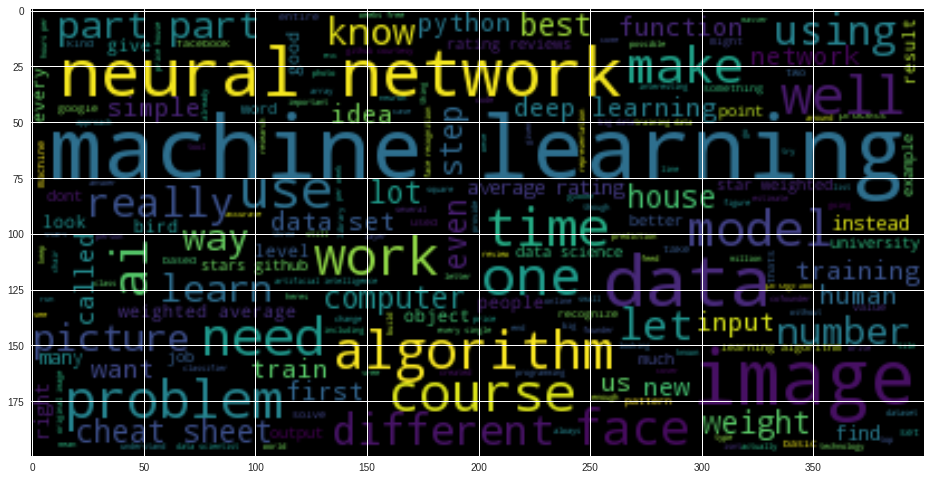

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=60).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")

What about frequency of the words?

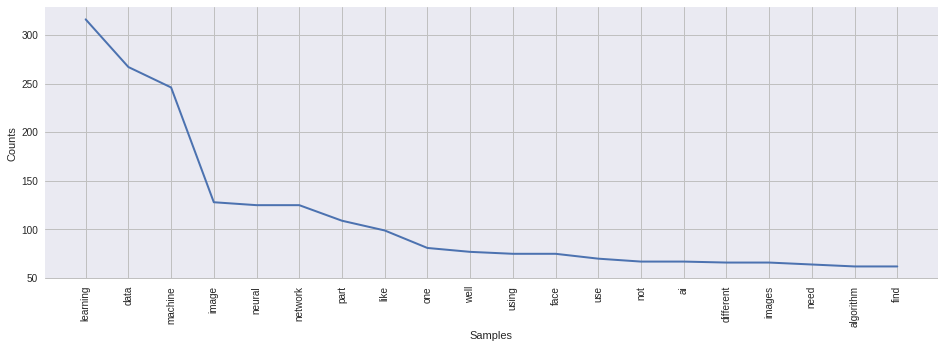

In [16]:
import nltk
freqdist = nltk.FreqDist(token.tokenize(totalText))
freqdist
plt.figure(figsize=(16,5))
freqdist.plot(20)

As you can see the most frequent words in the article is Learning,Data,Machine,ai etc

In [0]:
totalText=''
for x in df['Title']:
    ps=PreProcessing(x)
    totalText=totalText+" "+ps

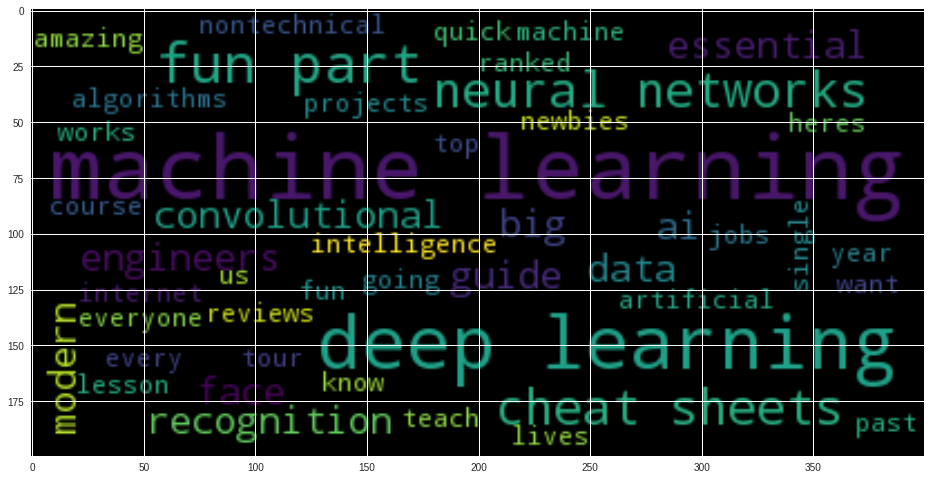

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=60).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")

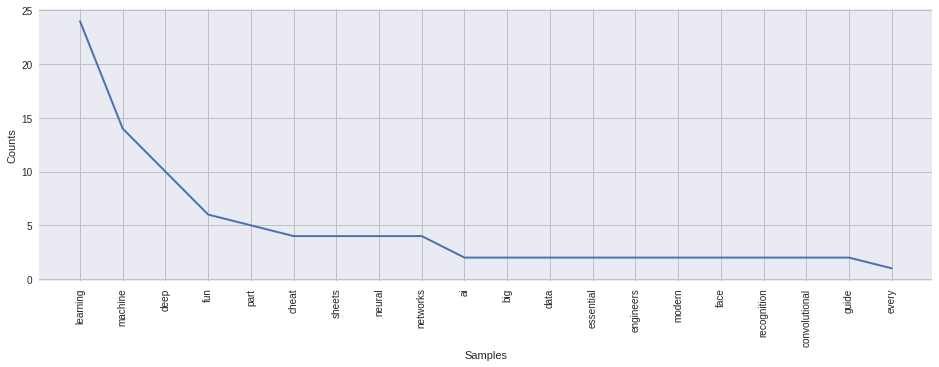

In [19]:
import nltk
freqdist = nltk.FreqDist(token.tokenize(totalText))
freqdist
plt.figure(figsize=(16,5))
freqdist.plot(20)

In [0]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2:-1]


In [0]:
okList=[]
for cl in dfT.columns:
     for n in df[cl]:
            okList.append(n)
okList=list(set(okList))
del(okList[okList.index('0')])

In [22]:
okList

['Jonathan Sugumar',
 'Some rights reserved',
 'Algorithms',
 'Startup',
 'Programming',
 'Neural Networks',
 'Business',
 'Artificial Intelligence',
 'Technology',
 'Tech',
 'Towards Data Science',
 'Startups',
 'Machine Learning',
 'Computer Science',
 'Nintendo',
 'Basic Income',
 'Big Data',
 'Data Science',
 'Deep Learning']

In [0]:
newDF=DataFrame(columns=okList)


In [0]:
for x in range(dfT.count()[0]):
    someDict={}
    for d in okList:
        rowdata=list(dfT.iloc[x])
        if d in rowdata:
            someDict[d]=1
        else:
            someDict[d]=0
    newDF=newDF.append(someDict,ignore_index=True)


In [25]:
newDF

,Jonathan Sugumar,Some rights reserved,Algorithms,Startup,Programming,Neural Networks,Business,Artificial Intelligence,Technology,Tech,Towards Data Science,Startups,Machine Learning,Computer Science,Nintendo,Basic Income,Big Data,Data Science,Deep Learning
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1
2,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
5,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
7,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
8,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [0]:
dfBA.index=range(dfBA.count()[0])
df=dfBA.join(newDF)

In [27]:
df

,Body,Title,Jonathan Sugumar,Some rights reserved,Algorithms,Startup,Programming,Neural Networks,Business,Artificial Intelligence,...,Tech,Towards Data Science,Startups,Machine Learning,Computer Science,Nintendo,Basic Income,Big Data,Data Science,Deep Learning
0,Update: This article is part of a series. Che...,Machine Learning is Fun!,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,"Over the past few months, I have been collect...","Cheat Sheets for AI, Neural Networks, Machine ...",0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
2,"A year and a half ago, I dropped out of one o...",Every single Machine Learning course on the in...,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
3,"Machine learning is complex. For newbies, sta...",Essential Cheat Sheets for Machine Learning an...,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
4,"In machine learning, there’s something called...",A Tour of The Top 10 Algorithms for Machine Le...,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,"For the past year, we’ve compared nearly 8,80...",30 Amazing Machine Learning Projects for the P...,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
6,Update: This article is part of a series. Che...,Machine Learning is Fun! Part 4: Modern Face R...,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
7,Update: This article is part of a series. Che...,Machine Learning is Fun! Part 3: Deep Learning...,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8,"I have a challenge for you. In a few seconds,...",The Non-Technical Guide to Machine Learning & ...,0,0,0,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0
9,Update: This article is part of a series. Che...,Machine Learning is Fun! Part 2,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [0]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2:-1].values
# using binary relevance
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
x1=df.Title
x2=df.Body
from pandas import DataFrame
cv=CountVectorizer().fit(x1)
header=DataFrame(cv.transform(x1).todense(),columns=cv.get_feature_names())
cvArticle=CountVectorizer().fit(x2)
article=DataFrame(cvArticle.transform(x2).todense(),columns=cvArticle.get_feature_names())
import pandas as pd
x=pd.concat([header,article],axis=1)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfhead=TfidfTransformer().fit(header)
head=DataFrame(tfidfhead.transform(header).todense())
tfidfart=TfidfTransformer().fit(article)
art=DataFrame(tfidfart.transform(article).todense())
import pandas as pd
x=pd.concat([head,art],axis=1)

In [31]:
!pip3 install scikit-multilearn

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))

predictions = classifier.predict(xtest.astype(float))
predictions.toarray()
from sklearn.metrics import accuracy_score
accuracy_score(ytest.astype(float),predictions)

    100% |████████████████████████████████| 92kB 4.1MB/s 


0.25

In [32]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))

# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.25

In [33]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))
# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.25

In [34]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=7)

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))
# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.25